# EastWestAirlines.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [3]:
airlines = pd.read_csv("EastWestAirlines.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline2=airlines.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
# Normaling data 
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


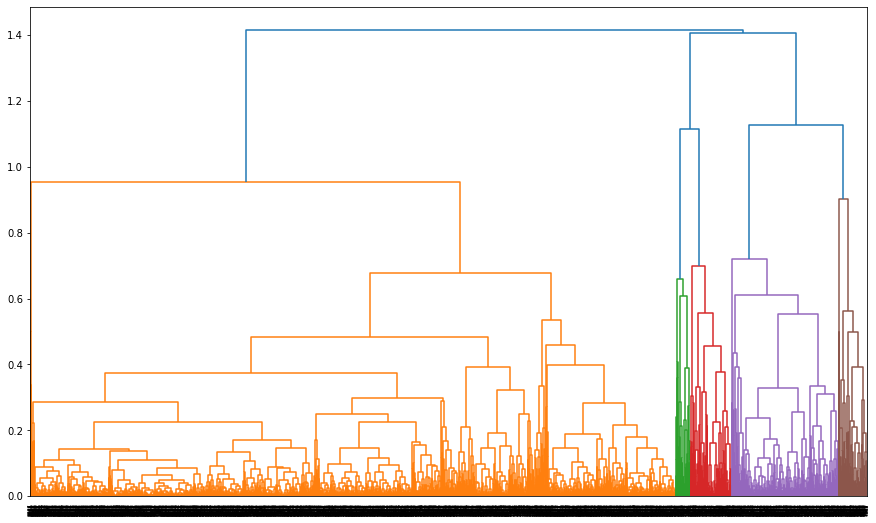

In [7]:
# Create Dendrograms
plt.figure(figsize=(15,9))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [8]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [9]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [10]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [11]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


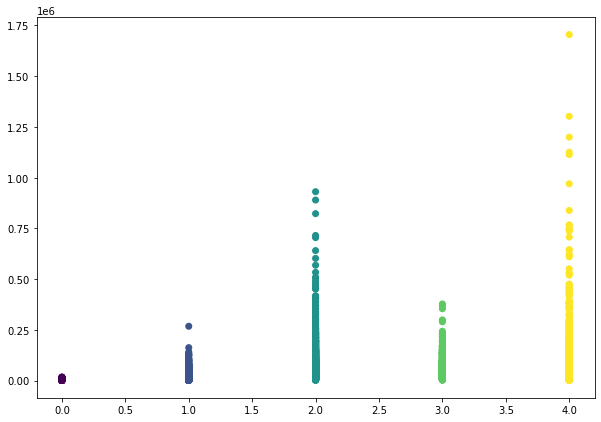

In [12]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_) 

# AgglomerativeClustering

In [13]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(airline2_norm) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline2['clust']=cluster_labels # creating a  new column and assigning it to new column 
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [14]:
airline2.iloc[:,1:].groupby(airline2.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clust
clust,,,,,,,,,,,,
0,84.310345,1.189655,1.051724,1.000000,5033.017241,9.224138,793.172414,2.482759,4373.120690,0.637931,0.879310,0.0
1,0.000000,1.000000,1.000000,1.000000,394.413793,2.034483,27.586207,0.137931,4856.402299,0.126437,0.000000,1.0
2,151.085456,2.018351,1.014243,1.008491,16013.185155,11.485620,447.798685,1.343194,4086.349493,0.336894,2.682553,2.0
3,98.074257,3.514851,1.014851,1.089109,48348.420792,18.475248,764.009901,2.118812,4314.381188,1.000000,1.000000,3.0
4,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000,1.000000,4.0


In [15]:
data = airline2[(airline2.clust==0)]
data  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clust
91,2000,0,1,1,1,2000,4,2000,4,6809,0,0,0
183,8933,0,2,1,1,8860,14,0,0,7533,1,1,0
198,8669,0,1,3,1,11397,16,0,0,7486,1,1,0
234,11449,0,2,1,1,9057,13,0,0,7397,1,1,0
241,2075,0,2,1,1,5002,14,0,0,7374,1,1,0
301,7061,0,1,1,1,7100,12,0,0,7218,0,1,0
392,11189,0,1,2,1,9044,20,0,0,8296,1,1,0
442,14528,0,1,1,1,6000,7,3000,6,8289,0,0,0
490,2701,0,1,1,1,5000,10,0,0,8002,1,1,0
496,2318,0,2,1,1,8747,14,0,0,7945,1,1,0


# k-menas clustering 

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
X = np.random.uniform(0,1,700)
Y = np.random.uniform(0,1,700)
X 

array([0.1810616 , 0.33793127, 0.19461306, 0.64759804, 0.47303282,
       0.73009297, 0.60236629, 0.60509432, 0.02044141, 0.28847742,
       0.22998721, 0.13845853, 0.95149272, 0.93444623, 0.60632512,
       0.00931964, 0.11029036, 0.75812172, 0.40852708, 0.49778908,
       0.44758312, 0.82335832, 0.05970598, 0.54516931, 0.26179535,
       0.8042798 , 0.59592246, 0.96654199, 0.57101815, 0.42953518,
       0.64446091, 0.00892932, 0.23006724, 0.50729237, 0.68475583,
       0.78212745, 0.18530646, 0.29569191, 0.6497858 , 0.92324822,
       0.99808268, 0.84010188, 0.95079962, 0.5462456 , 0.86643356,
       0.58772979, 0.40728798, 0.93918039, 0.92142222, 0.99058739,
       0.45023373, 0.95553831, 0.60542379, 0.4627327 , 0.88612594,
       0.98868478, 0.29649215, 0.10995096, 0.11489901, 0.85946936,
       0.84309787, 0.34027776, 0.14571054, 0.27901444, 0.48913577,
       0.1740401 , 0.48119808, 0.89837812, 0.43366579, 0.62530834,
       0.90877647, 0.53728376, 0.72679875, 0.93413141, 0.73866

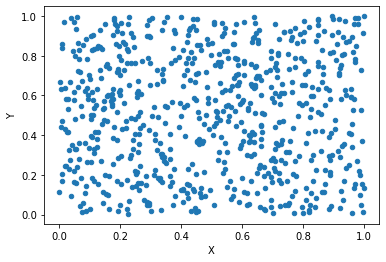

In [18]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

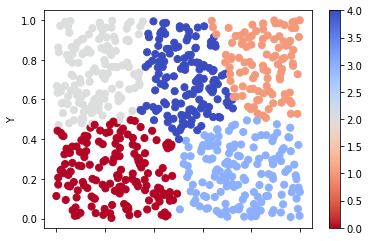

In [19]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

# DBSCAN Clustering

In [51]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
airline2_norm=StandardScaler().fit_transform(airline2)
airline2_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.25009890e+00, -6.90151998e-04],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01, -6.90151998e-04],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01, -6.90151998e-04],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -4.30851168e-01, -6.90151998e-04],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.25009890e+00, -6.90151998e-04],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01, -6.90151998e-04]])

In [66]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline2_norm)

DBSCAN(eps=1, min_samples=4)

In [67]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
# Adding clusters to dataset
airline2['clusters']=dbscan.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clust,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,4,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2,0


In [69]:
airline2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,166935.304560,870.011401,2.680782,1.057003,1.079805,38396.405537,21.618893,2111.013029,6.074919,4707.804560,0.697068,2.472313,2.035831
1,0,56090.896646,3.156845,1.686763,1.000000,1.000000,9338.331369,8.680870,118.443336,0.387126,3776.656392,0.000000,2.757933,2.000000
2,1,73266.844952,4.731971,2.558894,1.000000,1.000000,21693.693510,12.590144,234.913462,0.772837,4526.375000,1.000000,2.550481,2.000000
3,2,19812.031008,4.565891,3.790698,1.000000,1.000000,38903.565891,17.271318,142.558140,0.496124,4286.620155,1.000000,1.000000,3.000000
4,3,2291.157895,0.000000,1.000000,1.000000,1.000000,367.105263,1.789474,7.894737,0.065789,4781.618421,0.000000,0.000000,1.000000
5,4,9613.357143,35.714286,1.000000,1.000000,1.000000,1480.071429,4.928571,46.428571,0.142857,6053.357143,1.000000,0.000000,2.000000
6,5,4326.666667,0.000000,1.222222,1.000000,1.000000,5083.518519,8.185185,70.222222,0.185185,4996.333333,1.000000,0.925926,0.000000
7,6,157216.000000,83.333333,4.000000,1.000000,1.000000,35612.833333,18.666667,1580.166667,3.166667,6016.166667,1.000000,2.000000,2.000000
8,7,2530.333333,0.000000,1.000000,1.000000,1.000000,587.666667,3.777778,116.666667,0.333333,4853.555556,1.000000,0.000000,1.000000


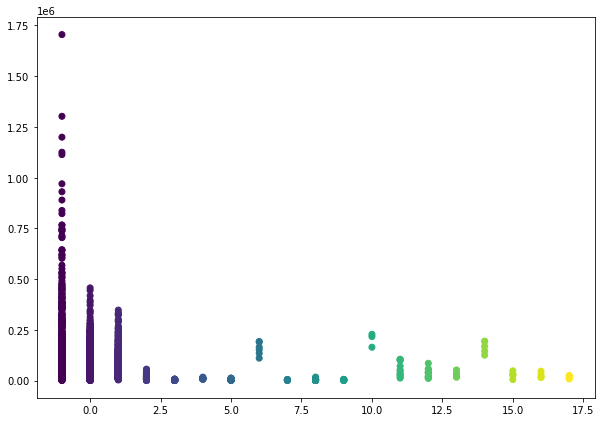

In [72]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clusters'],airline2['Balance'], c=dbscan.labels_)

# crime_data.csv

In [21]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
# normalizing the data set 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [23]:
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [24]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
data 

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


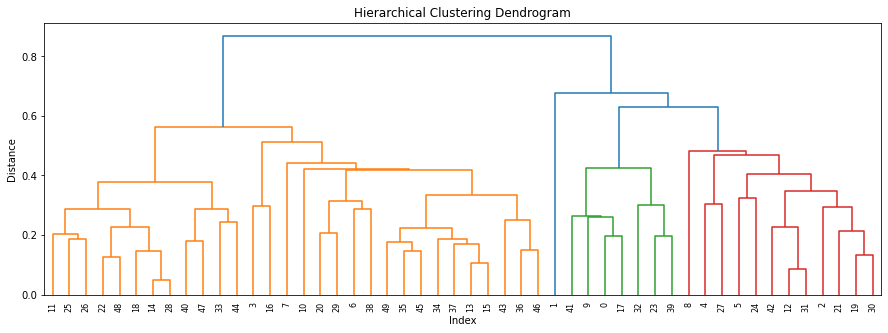

In [25]:
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(crime_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

# AgglomerativeClustering

In [26]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(crime_norm) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [27]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [28]:
data = crime[(crime.clust==0)]
data  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [29]:
data = crime[(crime.clust==1)]
data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [30]:
data = crime[(crime.clust==2)]
data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [31]:
data = crime[(crime.clust==3)]
data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [32]:
data = crime[(crime.clust==4)]
data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,4
14,Iowa,2.2,56,57,11.3,4
18,Maine,2.1,83,51,7.8,4
22,Minnesota,2.7,72,66,14.9,4
25,Montana,6.0,109,53,16.4,4
26,Nebraska,4.3,102,62,16.5,4
28,New Hampshire,2.1,57,56,9.5,4
33,North Dakota,0.8,45,44,7.3,4
40,South Dakota,3.8,86,45,12.8,4
44,Vermont,2.2,48,32,11.2,4


# k-menas clustering 

In [33]:
X = np.random.uniform(0,1,500)
Y = np.random.uniform(0,1,500)
X 

array([0.46434914, 0.21919127, 0.7820773 , 0.7364284 , 0.58700117,
       0.52843103, 0.21864672, 0.3996014 , 0.12140253, 0.3580205 ,
       0.19672911, 0.02390041, 0.90073338, 0.56911231, 0.12674014,
       0.79298454, 0.92134631, 0.8810924 , 0.90967846, 0.64207847,
       0.44526479, 0.42053362, 0.43677746, 0.29618447, 0.77897183,
       0.55860591, 0.62178728, 0.81044265, 0.11459155, 0.0203135 ,
       0.97247448, 0.13899538, 0.3308559 , 0.2470096 , 0.74914228,
       0.19786873, 0.47947415, 0.5367994 , 0.61119746, 0.27293957,
       0.63368722, 0.89675031, 0.60486244, 0.67386294, 0.28874727,
       0.29733944, 0.61747632, 0.39980798, 0.50691026, 0.91609745,
       0.42390272, 0.91957143, 0.99896592, 0.47148565, 0.9284481 ,
       0.17325216, 0.57148544, 0.02333958, 0.49272801, 0.66867043,
       0.78670999, 0.4366352 , 0.27604811, 0.06878516, 0.34294846,
       0.41734447, 0.78889397, 0.20237161, 0.90868342, 0.2118232 ,
       0.13050718, 0.9278372 , 0.43116861, 0.99674157, 0.68524

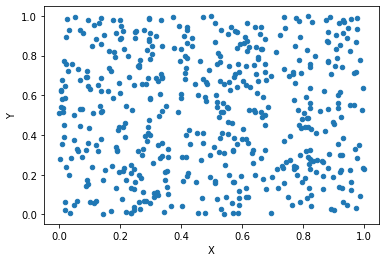

In [34]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

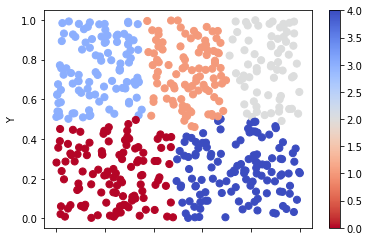

In [35]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

# DBSCAN

In [44]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape,clust,clusters
0,13.2,236,58,21.2,3,0
1,10.0,263,48,44.5,2,0
2,8.1,294,80,31.0,1,0
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,1,0
5,7.9,204,78,38.7,1,0
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,1,0
9,17.4,211,60,25.8,3,0


In [45]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.82092803,
         0.        ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.20829517,
         0.        ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.40433769,
         0.        ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.01697055,
         0.        ],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.40433769,
         0.        ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.40433769,
         0.        ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.01697055,
         0.        ],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.01697055,
         0.        ],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.40433769,
         0.        ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.82092803,
         0.        ],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [46]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [47]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  1, -1,  2,  1,  2, -1,
        0,  1, -1,  3, -1,  1, -1, -1,  1,  1, -1,  1,  3, -1, -1, -1,  1,
        2,  2,  2,  2,  3,  0,  1,  0, -1,  2,  1,  2,  2,  1,  1,  2],
      dtype=int64)

In [48]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clust,clusters
0,13.2,236,58,21.2,3,0
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,1,-1
3,8.8,190,50,19.5,0,-1
4,9.0,276,91,40.6,1,-1
5,7.9,204,78,38.7,1,-1
6,3.3,110,77,11.1,0,2
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,1,-1
9,17.4,211,60,25.8,3,-1


In [49]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,clust
,,mean,mean,mean,mean,mean
0,-1,10.840000,236.800000,69.700000,28.115000,1.15
1,0,14.050000,238.000000,57.750000,23.200000,3.00
2,1,3.091667,76.000000,52.083333,11.833333,4.00
3,2,5.827273,132.363636,69.636364,20.100000,0.00
4,3,5.066667,160.666667,87.000000,14.466667,0.00


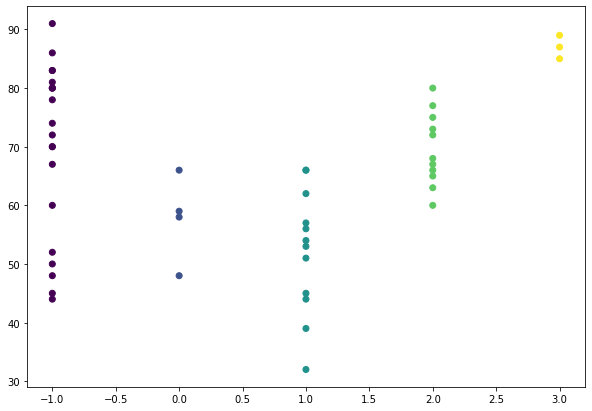

In [50]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)